<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

In [404]:
#Imports

import sklearn as sk
import pandas as pd
import numpy as np
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import scipy.stats as st

url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_test.csv?token=GHSAT0AAAAAACHIC2WUA47V565V4RQSZ4NYZIJBLQA'

plt.style.use('seaborn-v0_8-pastel')

# » Lectura del archivo

In [405]:
ds_original = pd.read_csv(url_test)

ds_base = ds_original.copy()
df_base = pd.DataFrame(ds_base)

# » Muestra del DataSet


In [406]:
df_base.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.0,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,No Deposit,30.0,NaN,176,Transient-Party,101.0,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,No Deposit,NaN,NaN,0,Transient,225.0,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,96.0,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,Non Refund,11.0,NaN,0,Transient,30.0,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214


# » Exploración Inicial y filtrado de datos.

### » Tipos de las varibales

In [407]:
df_base.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

### » Separación de variables cuantitativas del DataSet para analizar la media, mediana y moda.

In [408]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults', 'children','babies',
                                                         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                                                         'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]



ds_cuantitativo = df_base.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df['min'] = ds_cuantitativo.min()
df

,media,mediana,moda,max,min
lead_time,112.07,79.0,0.0,737.0,0.0
arrival_date_week_number,27.18,27.0,33.0,53.0,1.0
stays_in_weekend_nights,0.93,1.0,0.0,14.0,0.0
adults,1.87,2.0,2.0,50.0,0.0
children,0.10,0.0,0.0,3.0,0.0
babies,0.01,0.0,0.0,10.0,0.0
is_repeated_guest,0.03,0.0,0.0,1.0,0.0
previous_cancellations,0.10,0.0,0.0,26.0,0.0
previous_bookings_not_canceled,0.11,0.0,0.0,68.0,0.0
booking_changes,0.20,0.0,0.0,21.0,0.0


In [409]:
round(ds_cuantitativo.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,26535.0,112.07,110.15,0.0,23.0,79.0,171.0,737.0
arrival_date_week_number,26535.0,27.18,13.47,1.0,17.0,27.0,38.0,53.0
stays_in_weekend_nights,26535.0,0.93,1.01,0.0,0.0,1.0,2.0,14.0
adults,26535.0,1.87,0.63,0.0,2.0,2.0,2.0,50.0
children,26535.0,0.10,0.39,0.0,0.0,0.0,0.0,3.0
babies,26535.0,0.01,0.10,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,26535.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0
previous_cancellations,26535.0,0.10,0.90,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,26535.0,0.11,1.33,0.0,0.0,0.0,0.0,68.0
booking_changes,26535.0,0.20,0.65,0.0,0.0,0.0,0.0,21.0


### » Separación de las variables cualitativas y análisis.

In [410]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type', 'deposit_type',
                                 'customer_type']

ds_cualitativo = df_base.loc[:, nombre_variables_cualitativas]

### » Cantidad de valores que admiten las varibles cualitativas.

In [411]:
ds_cualitativo.nunique().sort_values(ascending=True)

hotel                     2
deposit_type              3
distribution_channel      4
customer_type             4
meal                      5
market_segment            7
reserved_room_type       10
assigned_room_type       11
arrival_date_month       12
country                 135
dtype: int64

### » Frecuencia de los valores
Los numeros representan el porcentaje de aparacion de la variable.

- **Hoteles.**

In [412]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.95
Resort Hotel    31.05
Name: hotel, dtype: float64


- **Tipo de depósito.**

In [413]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.33
Non Refund    16.57
Refundable     0.10
Name: deposit_type, dtype: float64


- **Canal de distribución.**

In [414]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.85
Direct       10.85
Corporate     5.16
GDS           0.14
Name: distribution_channel, dtype: float64

- **Tipo de cliente.**


In [415]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.54
Transient-Party    19.78
Contract            3.34
Group               0.34
Name: customer_type, dtype: float64

- **Comida.**

In [416]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.74
HB           11.66
SC            8.93
Undefined     0.90
FB            0.77
Name: meal, dtype: float64

- **Segmento de mercado (método de reserva).**

In [417]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 2)

Online TA        46.96
Offline TA/TO    20.00
Groups           19.13
Direct            9.25
Corporate         4.01
Complementary     0.46
Aviation          0.18
Name: market_segment, dtype: float64

- **Mes de llegada**

In [418]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.74
July         10.48
May          10.01
April         9.76
June          9.52
October       9.37
September     8.84
March         7.95
February      6.40
November      5.58
December      5.53
January       4.82
Name: arrival_date_month, dtype: float64

- **País**

In [419]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.495461
GBR     9.027988
FRA     8.010590
ESP     6.645234
DEU     5.313918
         ...    
MLT     0.003782
ATF     0.003782
TZA     0.003782
PAK     0.003782
NIC     0.003782
Name: country, Length: 135, dtype: float64

## » Separacion de las variables ordinales y analisis.

In [420]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = df_base.loc[:, nombre_variables_ordinales]

### » Frecuencia de los valores
Los numeros representan el porcentaje de aparacion de la variable.

- **Tipo de habitación reservada.**

In [421]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 3)

A    72.983
D    15.738
E     5.095
F     2.374
G     1.666
B     0.908
C     0.761
H     0.445
P     0.019
L     0.011
Name: reserved_room_type, dtype: float64

- **Tipo de habitación asignada**

In [422]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 2)

A    64.89
D    20.03
E     5.94
F     2.88
G     1.95
C     1.68
B     1.65
H     0.51
I     0.25
K     0.20
P     0.02
Name: assigned_room_type, dtype: float64

Grafico de la cantidad de habitaciones reservadas en los hoteles.

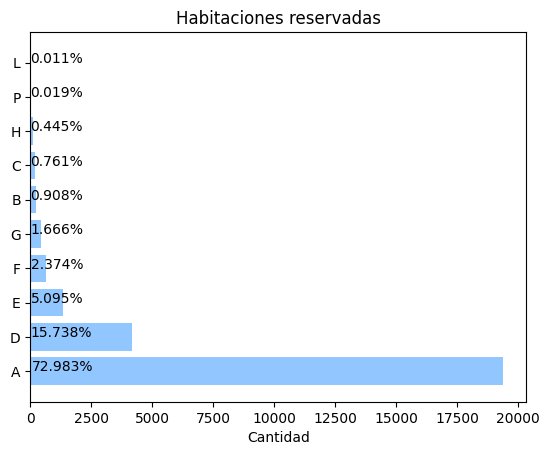

In [423]:

plt.barh( ds_ordinales['reserved_room_type'].value_counts().index, ds_ordinales['reserved_room_type'].value_counts())
plt.xlabel('Cantidad')
plt.title('Habitaciones reservadas')
valores_barras = round(ds_cualitativo['reserved_room_type'].value_counts(normalize = True) * 100, 3)

for index, value in enumerate(valores_barras):
    plt.text(value, index, str(value) +"%")


Grafico de la cantidad de habitaciones asignadas en los hoteles

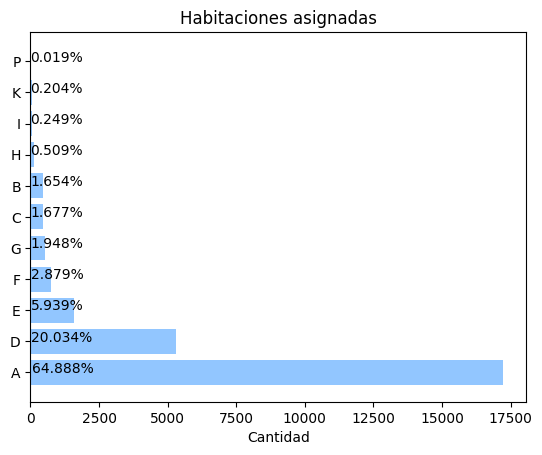

In [424]:

plt.barh(ds_ordinales['assigned_room_type'].value_counts().index, ds_ordinales['assigned_room_type'].value_counts())
plt.xlabel('Cantidad')
plt.title('Habitaciones asignadas')

valores_barras = round(ds_cualitativo['assigned_room_type'].value_counts(normalize = True) * 100, 3)
for index, value in enumerate(valores_barras):
    plt.text(value, index, str(value) +"%")


# » Matriz de correlaciones entre las variables.


<Axes: >

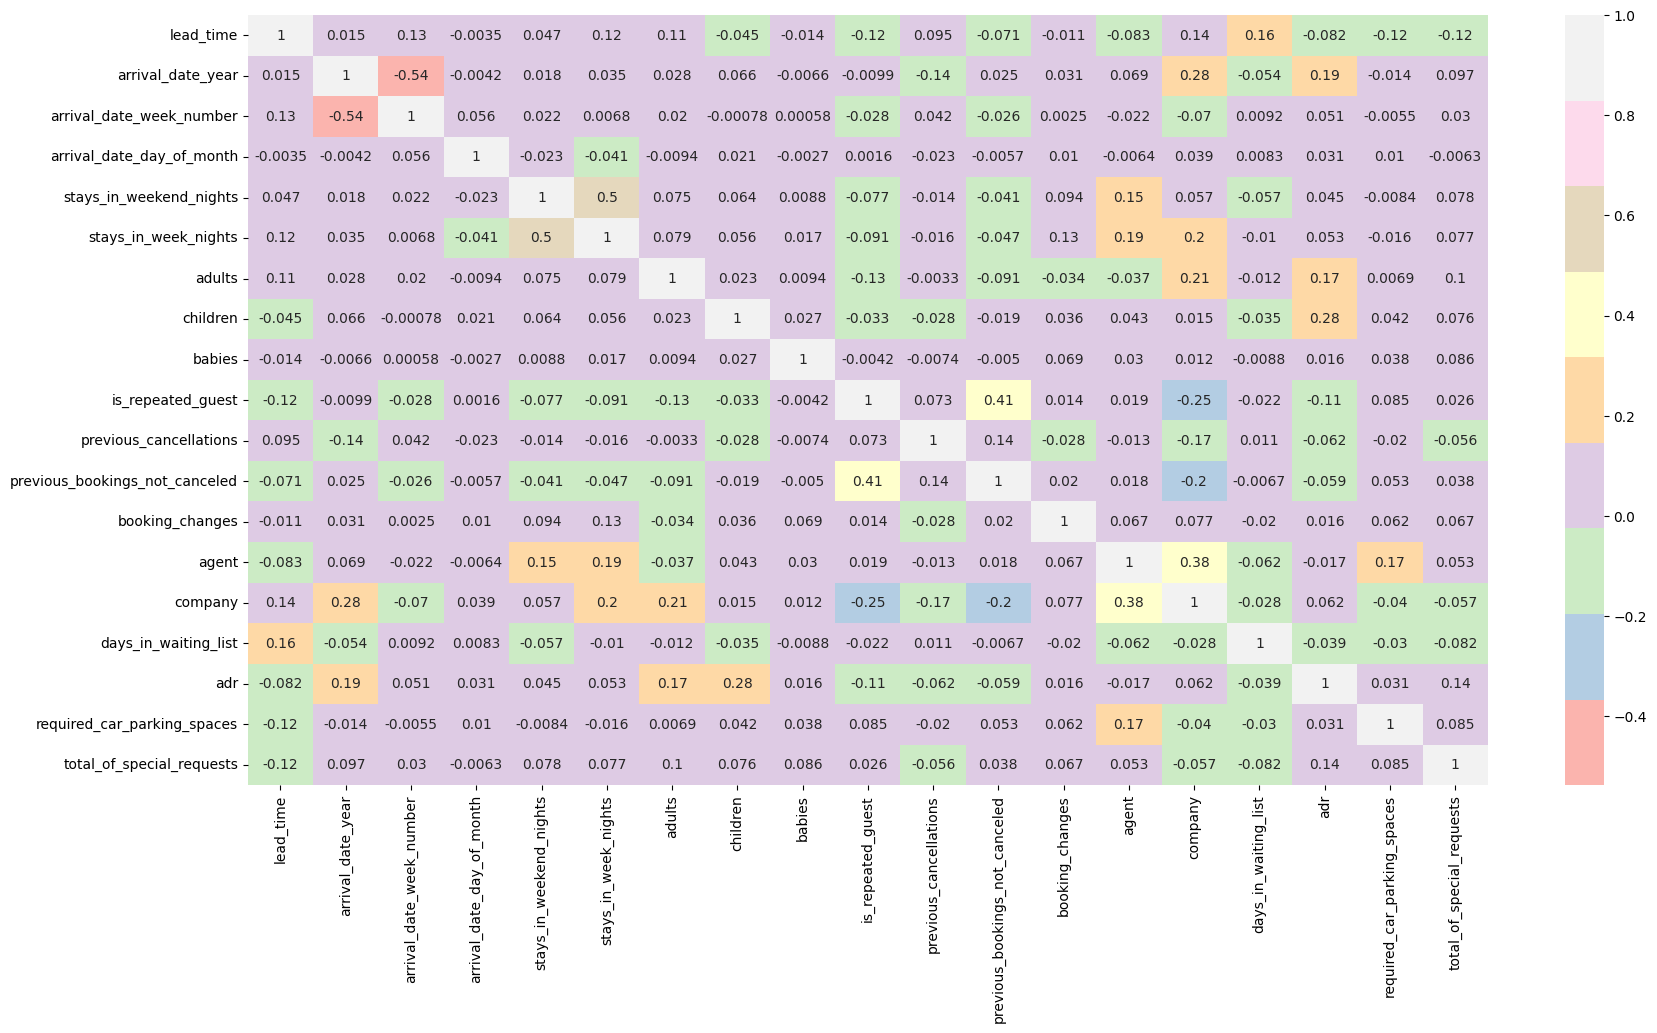

In [425]:
plt.figure(figsize = (20,10))
sns.heatmap(df_base.corr(numeric_only = True),annot = True, cmap= "Pastel1")


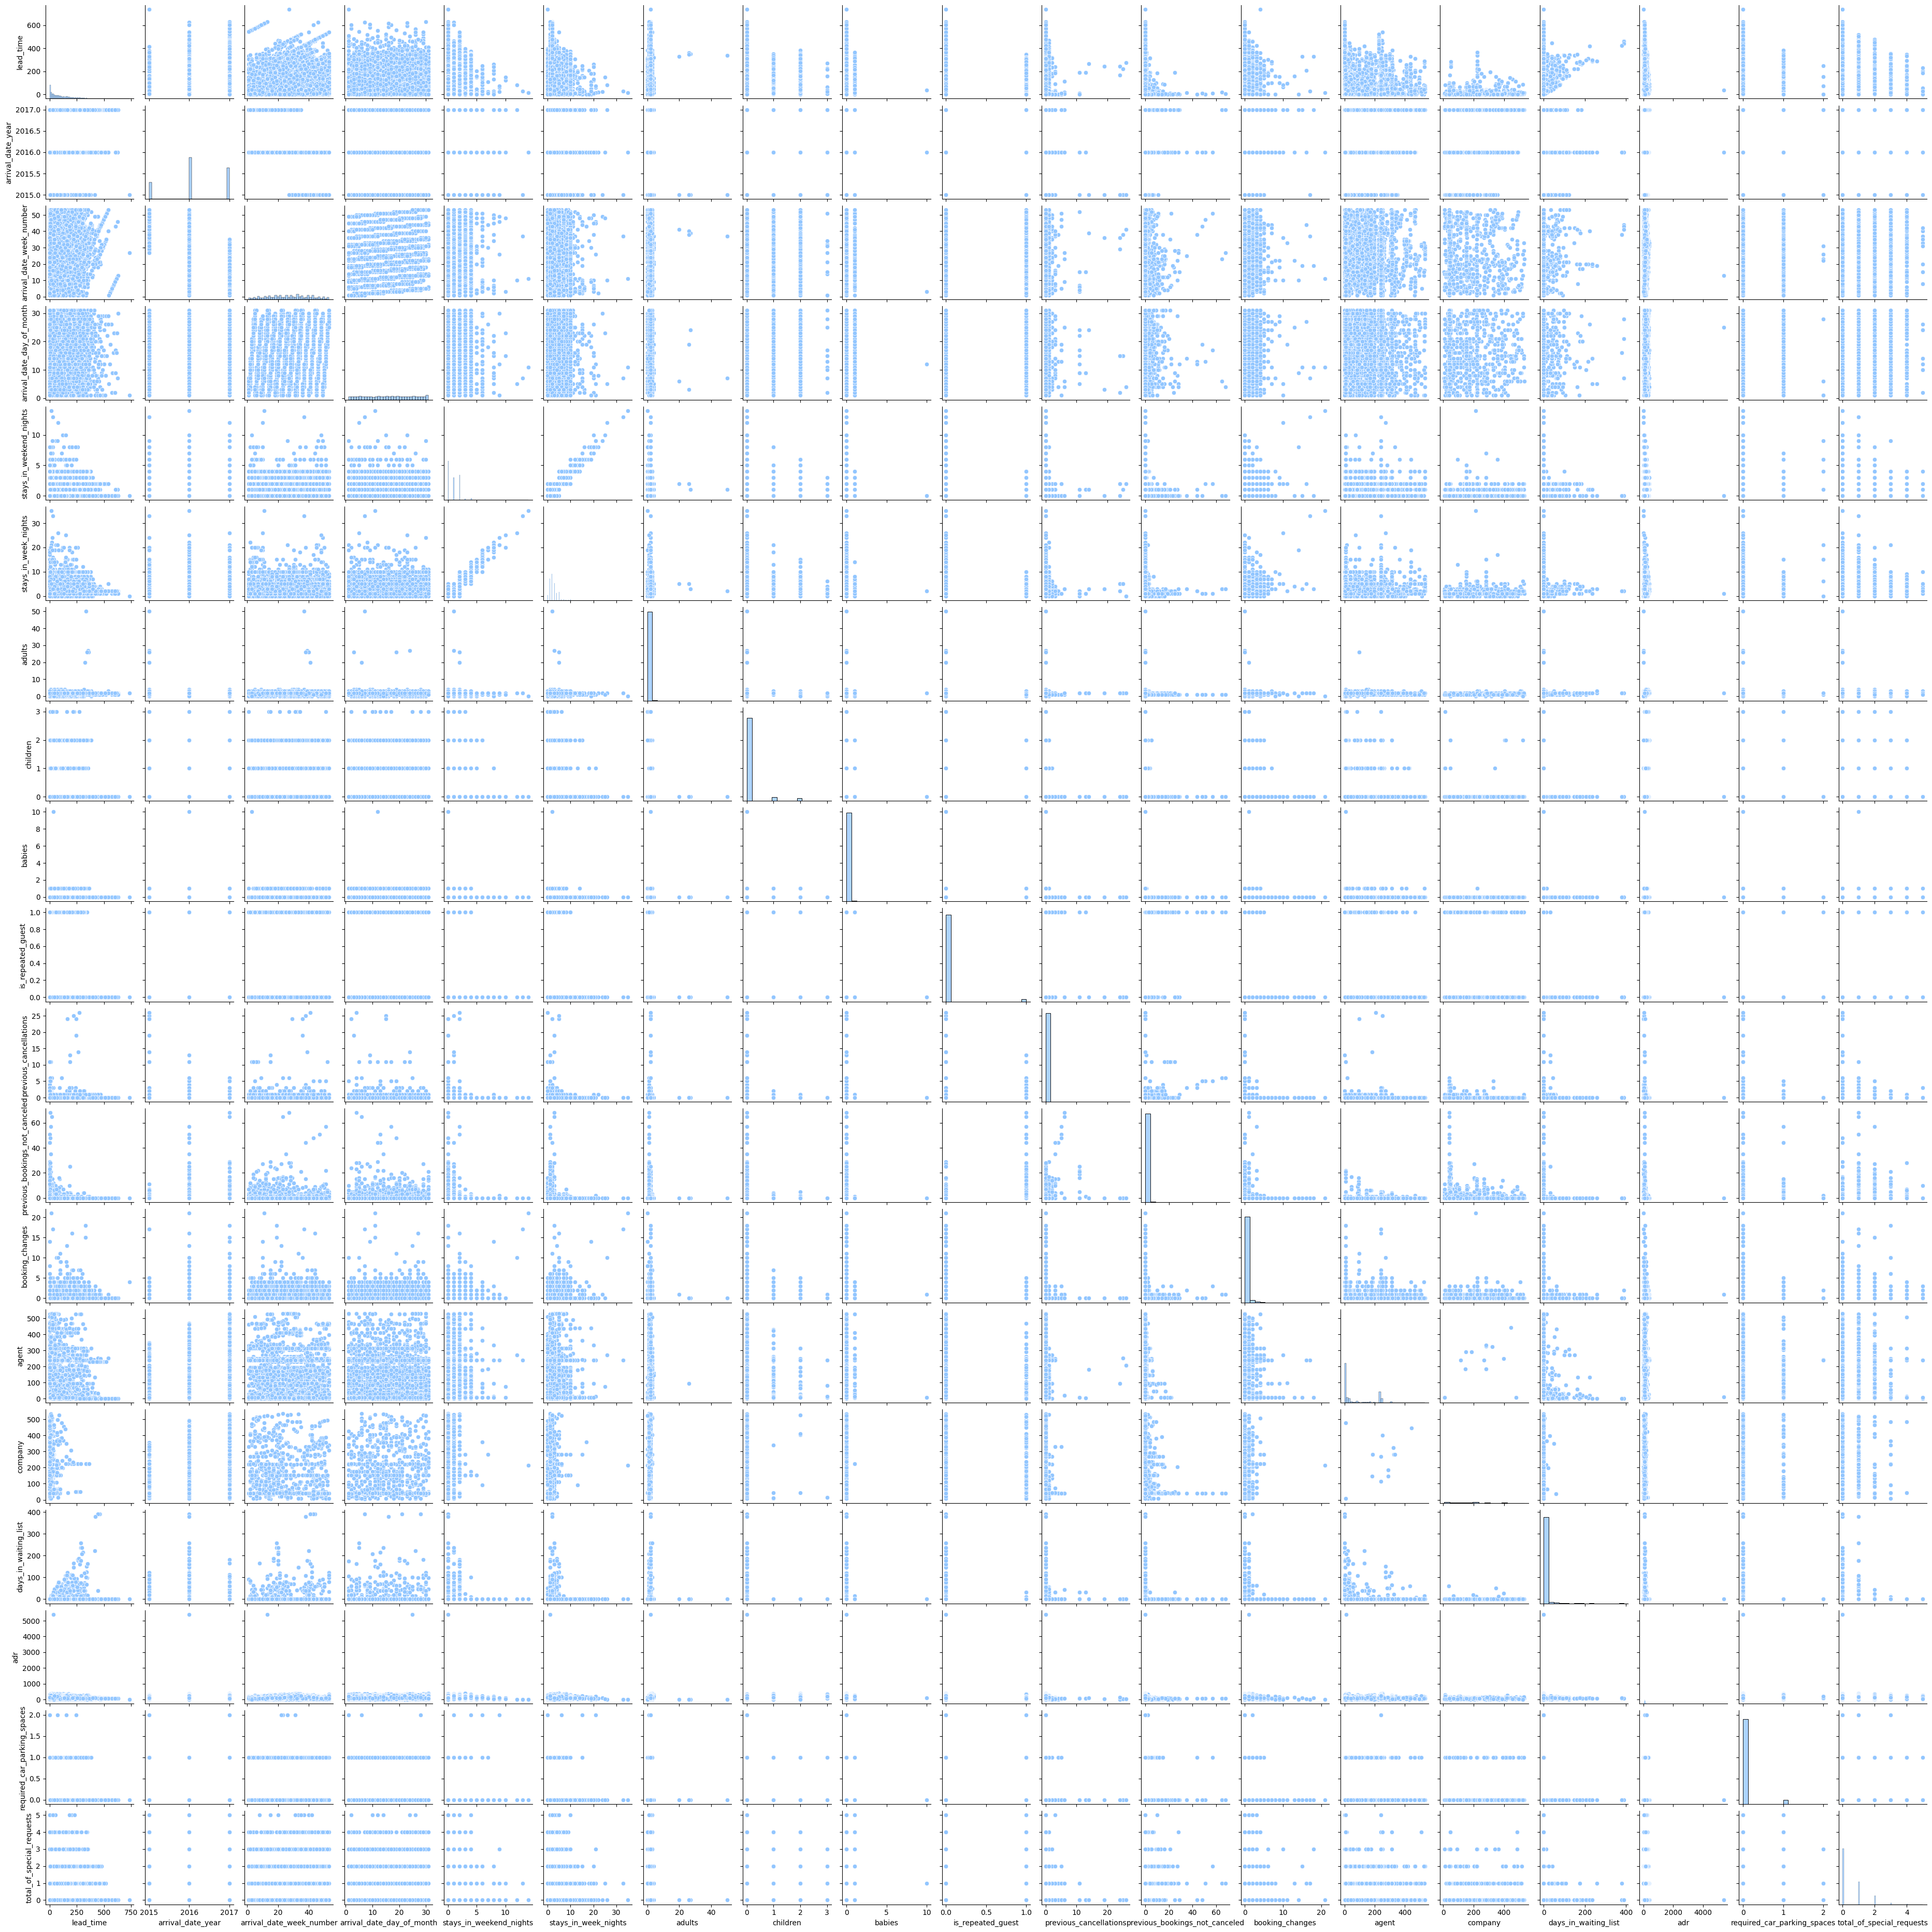

In [426]:
df_base.corr(numeric_only = True)
sns.pairplot(df_base, height=2)

# » Análisis gráfico de las distribuciones de las variables.

-  **Meses**


En el siguiente gráfico podemos observar cuales son los meses con mayor actividad de reserva en la totalidad de los hoteles.

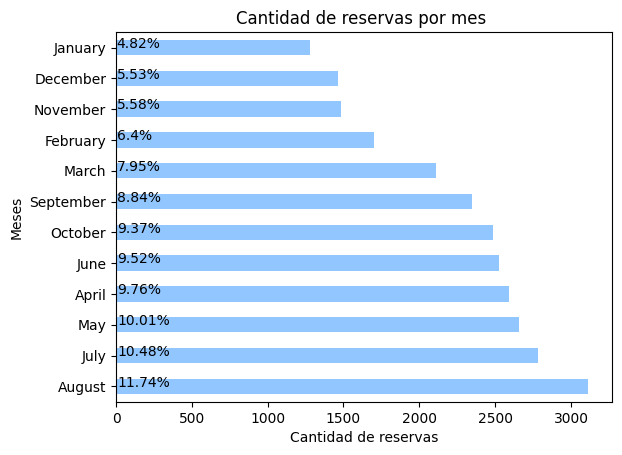

In [427]:
grafico_distribucion_meses = ds_cualitativo['arrival_date_month'].value_counts().plot.barh(alpha=1, title="Cantidad de reservas por mes ",xlabel='Cantidad de reservas',ylabel='Meses')

valores_barras = round(ds_cualitativo['arrival_date_month'].value_counts(normalize = True) * 100, 2)

for index, value in enumerate(valores_barras):
    plt.text(value, index, str(value) +"%")

- **Hoteles**

En el grafico a continuacion se logra observar el porcentaje en que se realizan reservas en cada hotel.

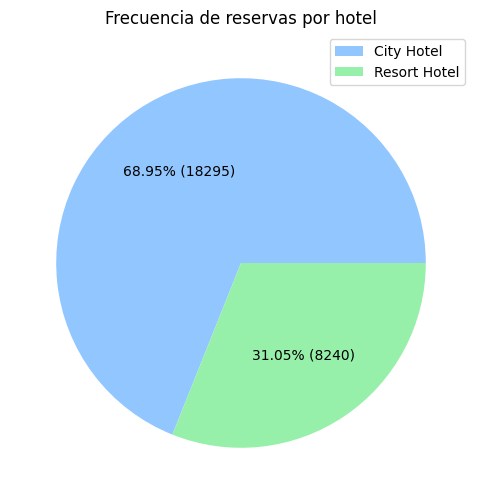

In [428]:
hoteles = ds_cualitativo.hotel.value_counts()

df = pd.DataFrame(hoteles)

valores = df['hotel']
categoria = df.index

plt.figure(figsize=(6, 6))

plt.pie(valores, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)
plt.title('Frecuencia de reservas por hotel')

plt.legend(labels=categoria, loc="best")

plt.show()

- **Tipo de deposito**

El siguiente grafico nos muestra los tipos tipos de depositos aceptados por los hoteles.

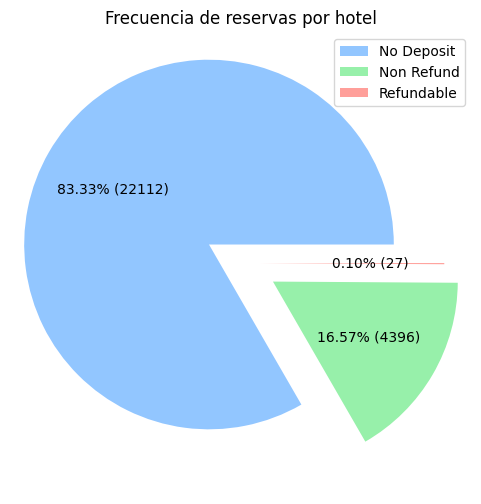

In [429]:
tipo_deposito = ds_cualitativo.deposit_type.value_counts()

df = pd.DataFrame(tipo_deposito)

valores = df['deposit_type']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0.2, 0.2, 0.1) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Frecuencia de reservas por hotel')

plt.legend(labels=categoria,loc="upper right")
plt.show()


- **Canal de distribucion**

El grafico de torta que se encuentra a continuacion representa el impacto que tiene cada tipo de canal de distribucion en la reserva de los hoteles.

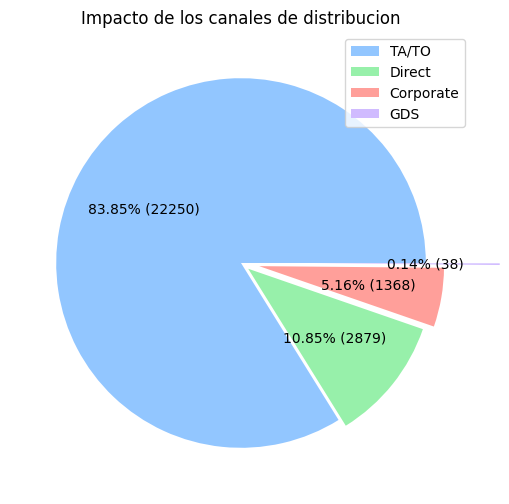

In [430]:
tipos_de_canales = ds_cualitativo.distribution_channel.value_counts()

df = pd.DataFrame(tipos_de_canales)

valores = df['distribution_channel']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.05, 0.1, 0.4) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Impacto de los canales de distribucion')

plt.legend(labels=categoria,loc="upper right")

plt.show()

- **Tipo de cliente**

En el siguiente grafico se representa los tipos de clientes que van a los hoteles.

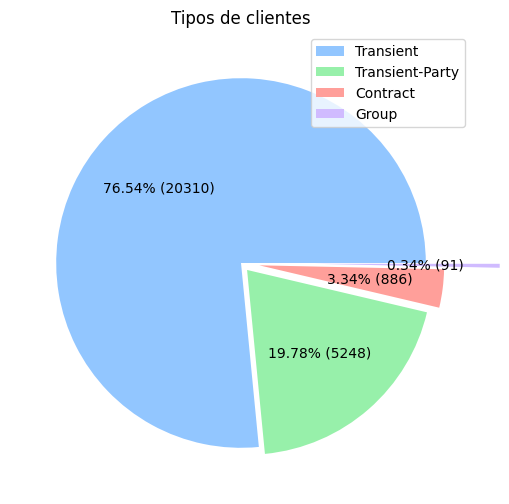

In [431]:
tipos_de_clientes = ds_cualitativo.customer_type.value_counts()

df = pd.DataFrame(tipos_de_clientes)

valores = df['customer_type']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.05, 0.1, 0.4) ,autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Tipos de clientes')

plt.legend(labels=categoria,loc="upper right")
plt.show()

- **Comida**

En el siguiente grafico se puede observar los tipos de comida ofrecidos por los hoteles a los clientes.

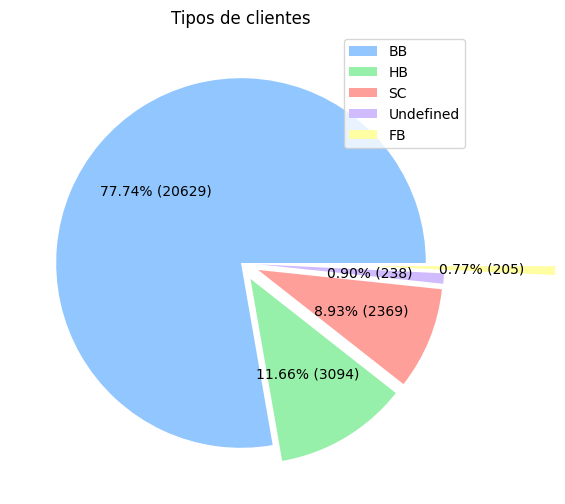

In [432]:
tipos_de_comidas = ds_cualitativo.meal.value_counts()

df = pd.DataFrame(tipos_de_comidas)

valores = df['meal']
categoria = df.index

plt.figure(figsize=(6, 6))
plt.pie(valores, explode=(0, 0.1, 0.1, 0.1, 0.7),autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*valores.sum()), startangle=0)

plt.title('Tipos de clientes')

plt.legend(labels=categoria,loc="upper right")
plt.show()

- **Segmento de mercado**

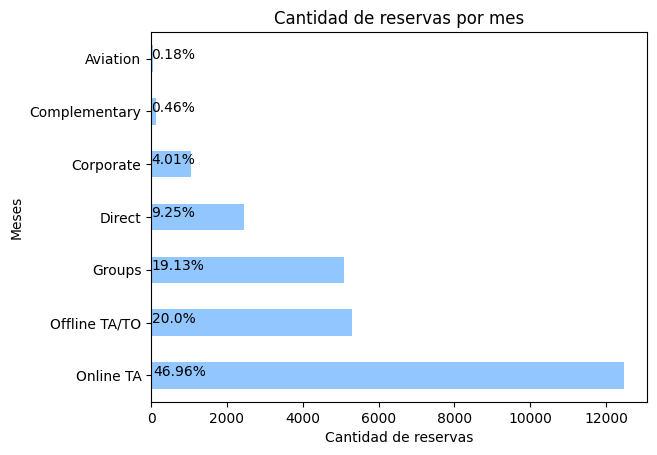

In [433]:
grafico_distribucion_meses = ds_cualitativo['market_segment'].value_counts().plot.barh(alpha=1, title="Cantidad de reservas por mes",xlabel='Cantidad de reservas',ylabel='Meses')
valores_barras = round(ds_cualitativo['market_segment'].value_counts(normalize = True) * 100, 2)

for index, value in enumerate(valores_barras):
    plt.text(value, index, str(value) +"%")

- **Paises con mas reservas en los hoteles**

El gráfico de barras que sigue presenta los 31 países de los cuales provienen la mayoría de los clientes.

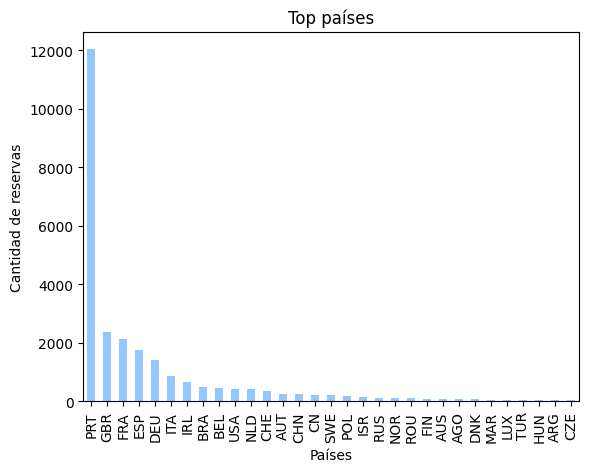

In [434]:
top_paises = ds_cualitativo['country'].value_counts().head(31)
paises = top_paises.plot.bar(alpha=1, title="Top países", xlabel='Países', ylabel='Cantidad de reservas')

# » Grafico de los valores atipicos

#### » Analisis y busqueda de valores atipicos en una sola variable

- **Cantidad de adultos por habitacion**

Vemos extraño el hecho de que haya 20 personas o mas en un habitacion por lo que son valores atipicos como se muestran en el histograma:
Solucion: Asumimos que fueron valores mal ingreasos por lo que seran reemplazados con la mediana.

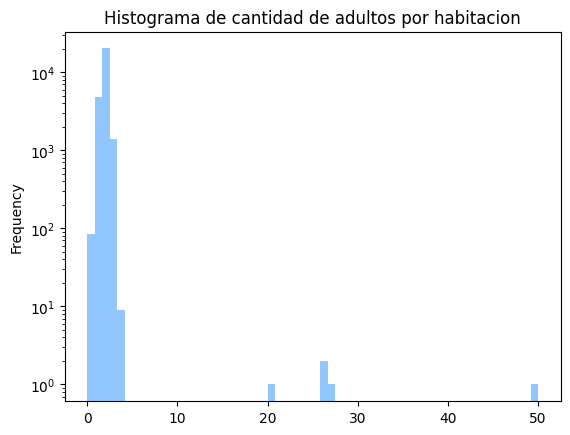

In [435]:
grf = df_base.adults.plot(kind = 'hist', bins= 60, log=True, ylabel='Cantidad', title='Histograma de cantidad de adultos por habitacion')

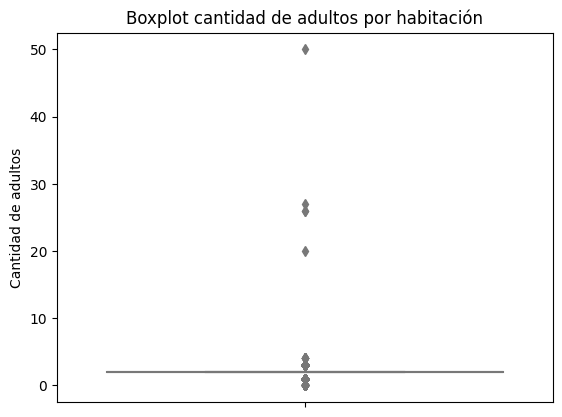

In [436]:
grf = sns.boxplot(y=df_base.adults, data= df_base ).set(title="Boxplot cantidad de adultos por habitación",xlabel="",ylabel="Cantidad de adultos")

Cambiamos los valores mayores a 6 y menores a 1 por la mediana.

In [437]:
ds_adults = df_base.loc[:, 'adults']

df_base['adults'].mask(df_base['adults'] > 6, ds_adults.median(), inplace=True)
df_base['adults'].mask(df_base['adults'] < 1, ds_adults.median(), inplace=True)

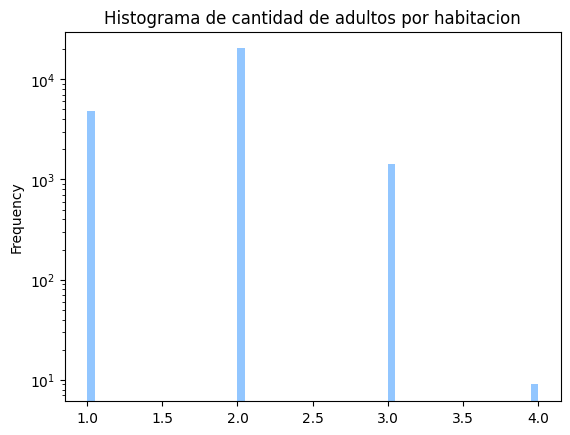

In [438]:
grf = df_base['adults'].plot(kind = 'hist', bins= 60, log=True, ylabel='Cantidad', title='Histograma de cantidad de adultos por habitacion')

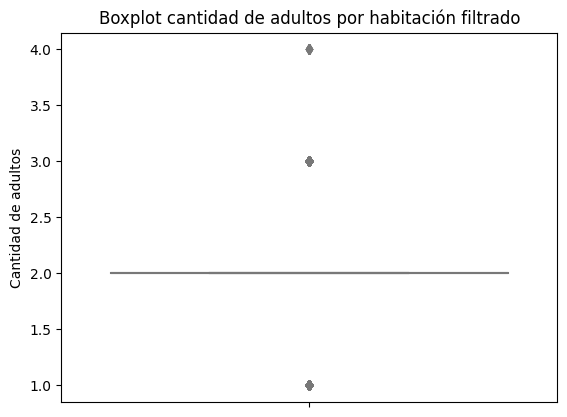

In [439]:
grf = sns.boxplot(y=df_base.adults, data= df_base ).set(title="Boxplot cantidad de adultos por habitación filtrado",xlabel="",ylabel="Cantidad de adultos")

- **Estadia los fines de semana en el hotel**

Nos llamo la atencion que haya clientes que pasen mas de 10 findesemana en el hotel como se puede ver en el grafico. La mayoria suelen estar 2 fines de semana.

Solución: No creemos que se deba tomar ninguna medida ya que si el cliente desea estar mas fines de semana que lo normal puede estarlo sin problemas. Por lo tanto lo dejamos igual.

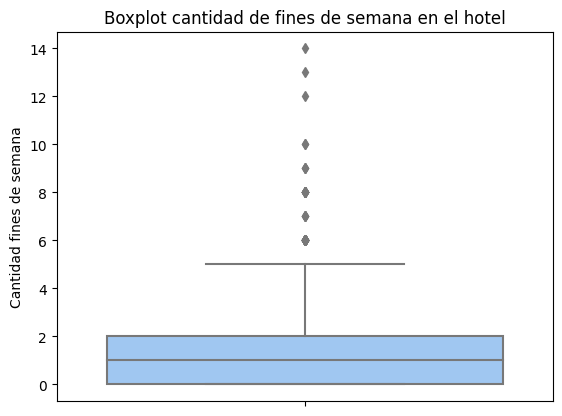

In [440]:
grf = sns.boxplot(y=df_base.stays_in_weekend_nights, data= df_base).set(title="Boxplot cantidad de fines de semana en el hotel",xlabel="",ylabel="Cantidad fines de semana")

- **Cantidad de bebes en cada familia**

Al observar la cantidad de bebes por familia aparece un valor bastante atipico el cual nos indica que una familia tiene 10 bebes.

Solucion: Cambiar el valor mal ingresado de la cantidad de bebes por la mediana.

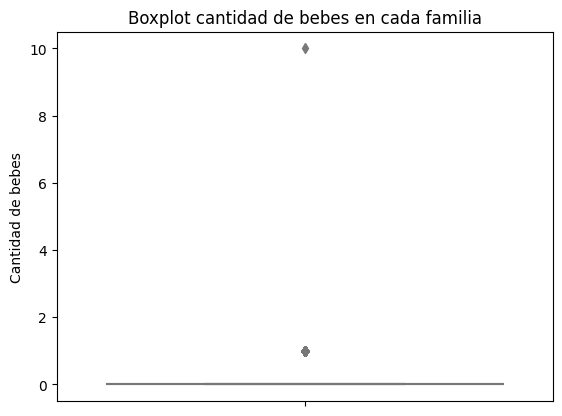

In [441]:
grf = sns.boxplot(y=df_base.babies, data= df_base).set(title="Boxplot cantidad de bebes en cada familia",xlabel="",ylabel="Cantidad de bebes")

Cambiamos los valores de las filas con valores atipicos


In [442]:
ds_bebes = ds_base.loc[:, 'babies']

df_base['babies'].mask(df_base['babies'] > 3, ds_bebes.median(), inplace=True)

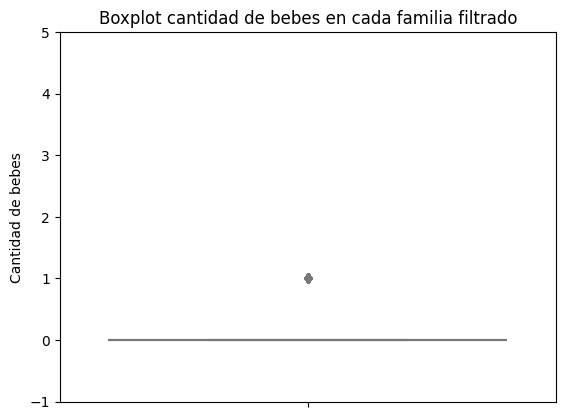

In [443]:
grf = sns.boxplot(y=df_base.babies, data= df_base).set(title="Boxplot cantidad de bebes en cada familia filtrado",xlabel="",ylabel="Cantidad de bebes")
plt.ylim(-1,5)
plt.show()

- **Cancelaciones previas de la habitacion**

Si bien vemos que hay un algunos valores bastante por encima del promedio, no nos parece que haya que borrarlos ni modificarlos, por lo que los dejaremos como estan ya que posiblemente nos sean de gran utilidad a la hora de predecir la posibilidad de que sea cancelada la reserva.
Esta variable nos sera de gran utilidad a la hora de predecir el ***`TARGET`***

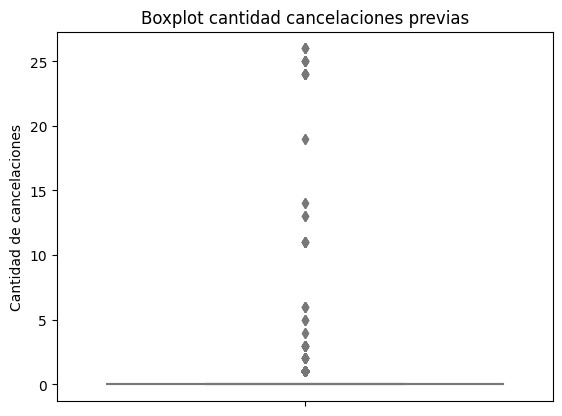

In [444]:
grf = sns.boxplot(y=df_base.previous_cancellations, data= df_base).set(title="Boxplot cantidad cancelaciones previas",xlabel="",ylabel="Cantidad de cancelaciones")

- **Dias en la lista de espera**

Al analizar el grafico notamos que hay varios valores por arriba la mediana creemos que van a ser utilises a la hora de analizar la posible cancelacion.
 Esta variable nos sera de gran utilidad a la hora de predecir el *TARGET*

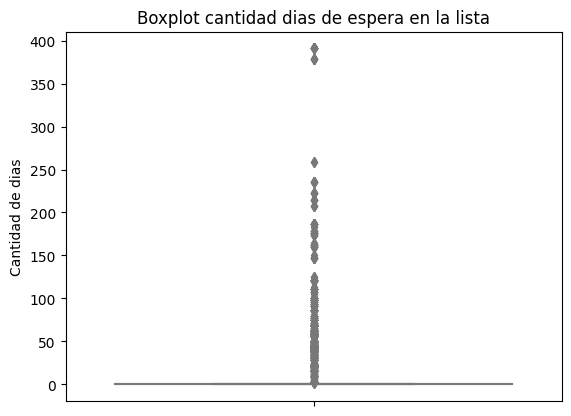

In [445]:
grf = sns.boxplot(y = df_base.days_in_waiting_list, data = df_base).set(title="Boxplot cantidad dias de espera en la lista",xlabel="",ylabel="Cantidad de dias")

- **ADR**

Vemos que tenemos un valor exageradamente por encima de los demas, y es extremademente atipico, por lo que tambien lo cambiamos por el valor de la mediana.

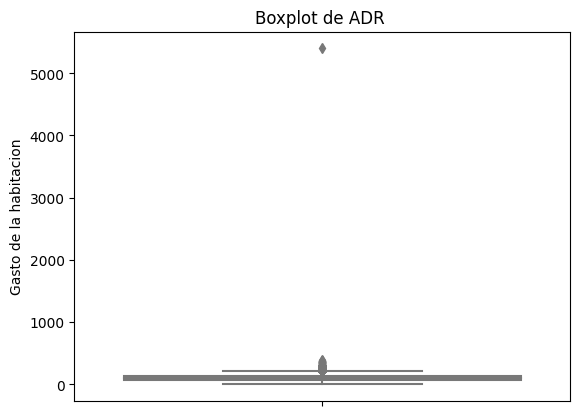

In [446]:
grf = sns.boxplot(y= df_base.adr, data= df_base ).set(title="Boxplot de ADR ",xlabel="",ylabel="Gasto de la habitacion")

In [447]:
ds_adr = df_base.loc[:, 'adr']

df_base['adr'].mask(df_base['adr'] >= 4000, ds_adr.median(), inplace=True)

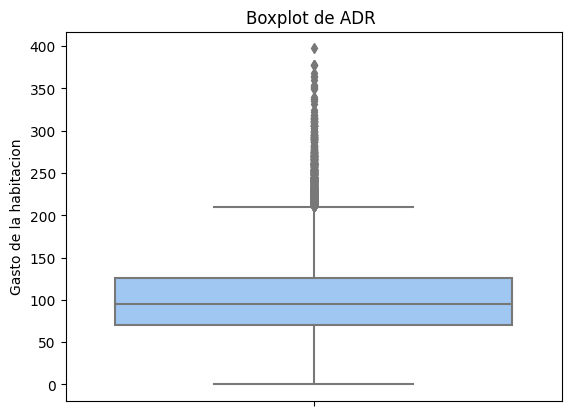

In [448]:
grf = sns.boxplot(y= df_base.adr, data= df_base ).set(title="Boxplot de ADR ",xlabel="",ylabel="Gasto de la habitacion")

#### » Analisis y busqueda de valores atipicos en multivariables

- **Dispersograma entre adultos e hijos**

El grafico fue creado con el objetivo de ver la existencia de registros de hijos sin adultos, el cual podria llegar a ser un valor atipico multivariado.

Si observamos la imagen no encontramos ningun valor extraño.

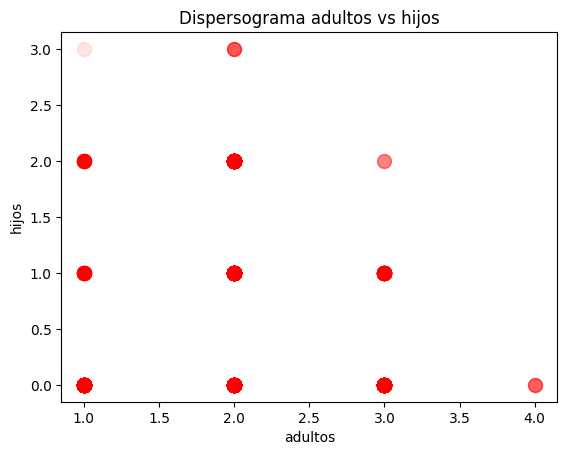

In [449]:
plt.scatter(df_base.adults,df_base.children, s=100, color="red",alpha=0.1)
plt.title('Dispersograma adultos vs hijos')
plt.xlabel('adultos')
plt.ylabel('hijos')
plt.show()

- **Dispersograma entre adultos y bebes**

El grafico fue creado con el objetivo de ver la existencia de registros de bebes sin adultos, el cual podria llegar a ser un valor atipico multivariado.

Si observamos la imagen no encontramos ningun valor extraño.

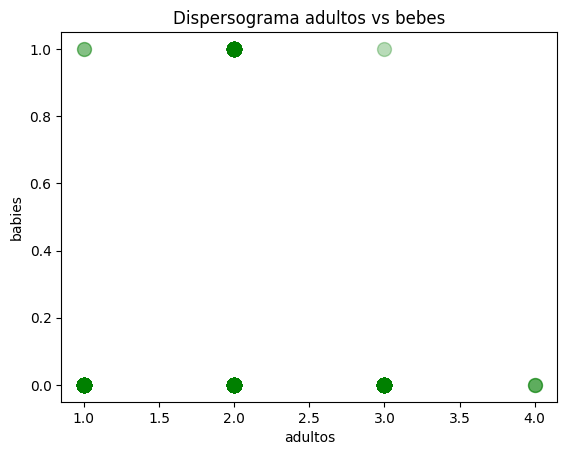

In [450]:
plt.scatter(df_base.adults,df_base.babies,  s=100, color="green",alpha=0.1)
plt.title('Dispersograma adultos vs bebes')
plt.xlabel('adultos')
plt.ylabel('babies')
plt.show()

- Analisis entre stays_in_weekend_nights y stays_in_weeke_nights

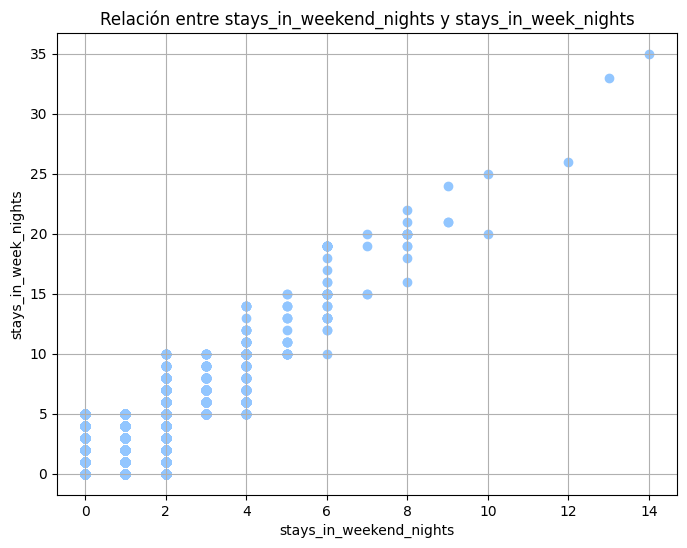

In [451]:
plt.figure(figsize=(8, 6))
plt.scatter(df_base['stays_in_weekend_nights'], df_base['stays_in_week_nights'])
plt.title('Relación entre stays_in_weekend_nights y stays_in_week_nights')
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('stays_in_week_nights')
plt.grid(True)

# Mostrar el gráfico
plt.show()

- Analisis entre previous_cancellations y previous_bookings_not_canceled

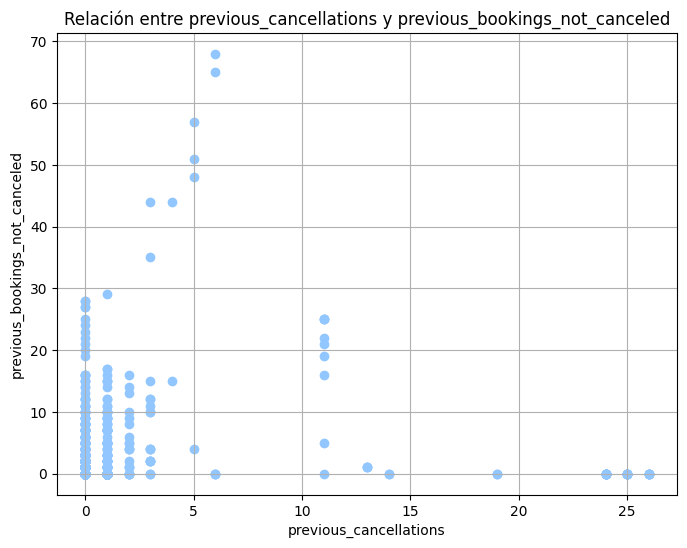

In [452]:

plt.figure(figsize=(8, 6))
plt.scatter(df_base['previous_cancellations'], df_base['previous_bookings_not_canceled'])
plt.title('Relación entre previous_cancellations y previous_bookings_not_canceled')
plt.xlabel('previous_cancellations')
plt.ylabel('previous_bookings_not_canceled')
plt.grid(True)

# Mostrar el gráfico
plt.show()

- Analisis entre is_repeated_guest y previous_cancellations

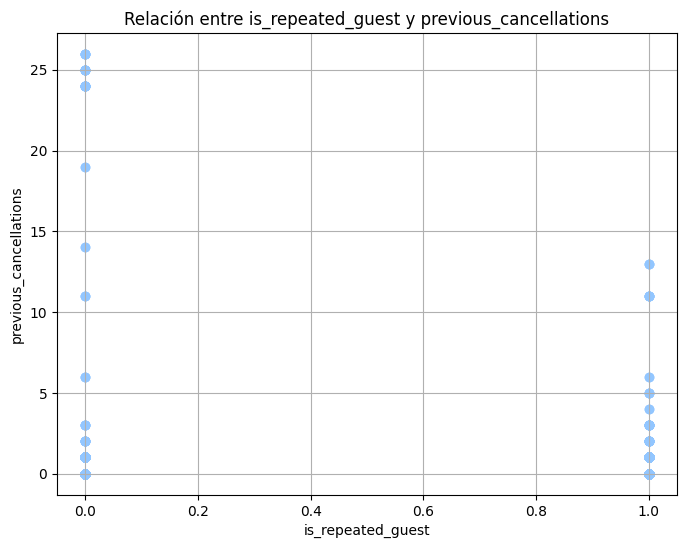

In [453]:

plt.figure(figsize=(8, 6))
plt.scatter(df_base['is_repeated_guest'], df_base['previous_cancellations'])
plt.title('Relación entre is_repeated_guest y previous_cancellations')
plt.xlabel('is_repeated_guest')
plt.ylabel('previous_cancellations')
plt.grid(True)

# Mostrar el gráfico
plt.show()

- Analisis entre is_repeated_guest y previous_bookings_not_canceled

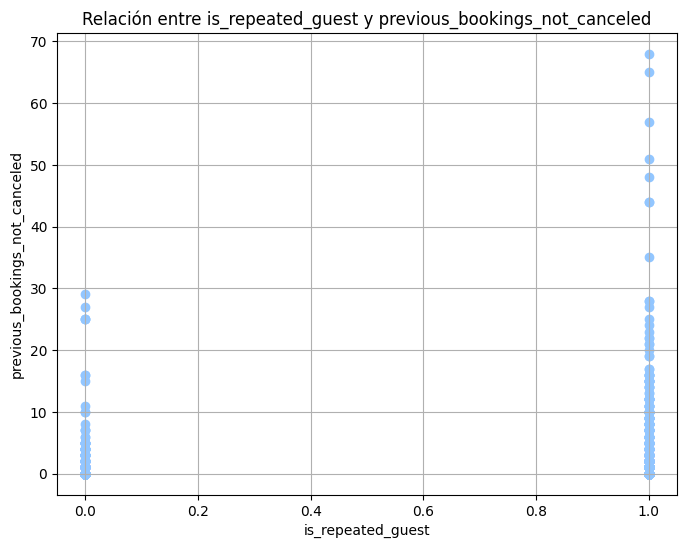

In [454]:

plt.figure(figsize=(8, 6))
plt.scatter(df_base['is_repeated_guest'], df_base['previous_bookings_not_canceled'])
plt.title('Relación entre is_repeated_guest y previous_bookings_not_canceled')
plt.xlabel('is_repeated_guest')
plt.ylabel('previous_bookings_not_canceled')
plt.grid(True)

# Mostrar el gráfico
plt.show()

- Analisis de outliers con z score modificado

In [455]:
def compute_mzscore(series):
    median_value = series.median()
    mad = np.median(np.abs(series - median_value))
    mzscore = 0.6745 * (series - median_value) / mad
    return mzscore

columns_and_mzscores = {
    'adults': 'mz_adults',
    'booking_changes': 'mz_booking_changes',
    'required_car_parking_spaces': 'mz_required_car_parking_spaces',
    'total_of_special_requests': 'mz_total_of_special_requests',
    'is_repeated_guest': 'mz_is_repeated_guest',
    'previous_cancellations': 'mz_previous_cancellations',
    'stays_in_weekend_nights': 'mz_stays_in_weekend_nights'
}

shape1 = df_base.shape

for col, mzscore_col in columns_and_mzscores.items():
    df_base[mzscore_col] = compute_mzscore(df_base[col])

for col, mzscore_col in columns_and_mzscores.items():
    median_value = df_base[col].median()
    df_base.loc[df_base[mzscore_col] > 3.5, col] = median_value
    df_base.loc[df_base[mzscore_col] < -3.5, col] = median_value

df_base = df_base.drop(columns=list(columns_and_mzscores.values()))

shape2 = df_base.shape

print(shape1, shape2)

(26535, 31) (26535, 31)


- Analisis con mahalanobis

In [456]:

vmedias=np.mean(df_base[['stays_in_weekend_nights','stays_in_week_nights']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df_base[['stays_in_weekend_nights','stays_in_week_nights']] - vmedias

#Calculo matriz de covarianza y su inversa
cov=df_base[['stays_in_weekend_nights','stays_in_week_nights']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

df_base['mahalanobis']=mahal.diagonal()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<Axes: ylabel='mahalanobis'>

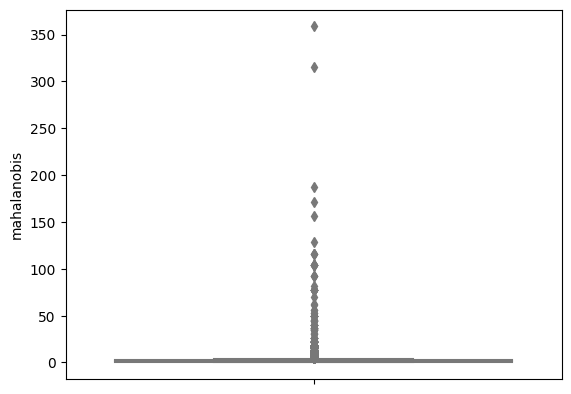

In [457]:
sns.boxplot(y=df_base.mahalanobis)

# » Análisis de las correlaciones entre las variables.

- **Correlacion entre 'previous_booking_not_canceled' y 'is_repeated_guest'**

El siguiente grafico muestra como dependiendo del hotel y si es un cliente repetido se relaciona con las la cantidad de veces que no cancelo su reserva .

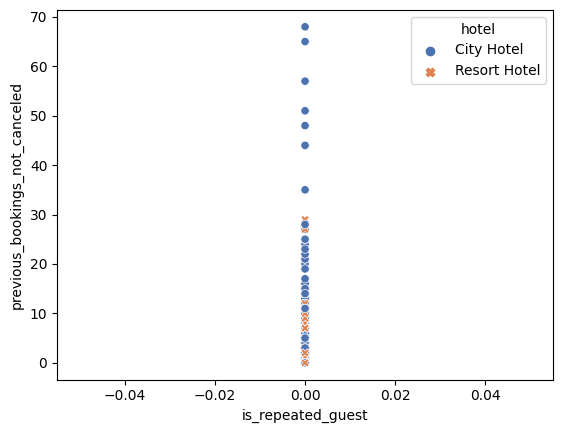

In [458]:
variables = ['previous_bookings_not_canceled', 'is_repeated_guest', 'hotel']
df = df_base.loc[:, variables]
grf = sns.scatterplot(data=df, y="previous_bookings_not_canceled", x="is_repeated_guest", style="hotel", hue="hotel", palette="deep")

- **Correlacion entre 'previous_cancellations' y 'is_repeated_guest'**

El siguiente grafico muestra como dependiendo del hotel y si es un cliente repetido se relaciona con las cancelaciones previas.

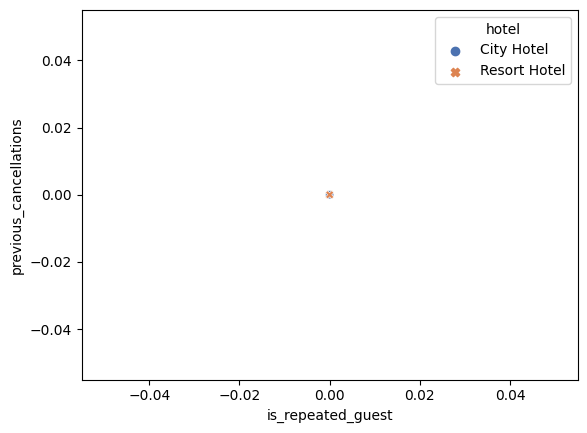

In [459]:
variables = ['previous_cancellations', 'is_repeated_guest', 'hotel']
df = df_base.loc[:, variables]
grf = sns.scatterplot(data=df, y="previous_cancellations", x="is_repeated_guest", style="hotel", hue="hotel", palette="deep")


- **Correlacion entre 'booking_changes' y 'is_repeated_guest'**

El siguiente grafico muestra como dependiendo del hotel y si es un cliente repetido se relaciona con las cantidad de veces que cambio la reserva.

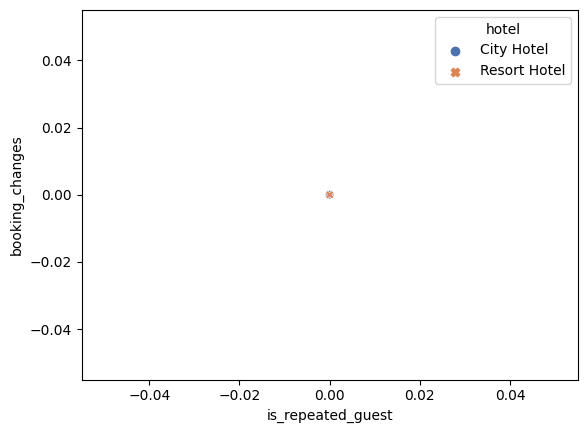

In [460]:
variables = ['booking_changes', 'is_repeated_guest', 'hotel']
df = df_base.loc[:, variables]
grf = sns.scatterplot(data=df, y="booking_changes", x="is_repeated_guest", style="hotel", hue="hotel", palette="deep")

- **Correlacion entre 'days_in_waiting_list' y 'is_repeated_guest'**

El siguiente grafico muestra como dependiendo del hotel y si es un cliente repetido se relaciona con la cantidad de dias que estan los clientes en la lista de espera.

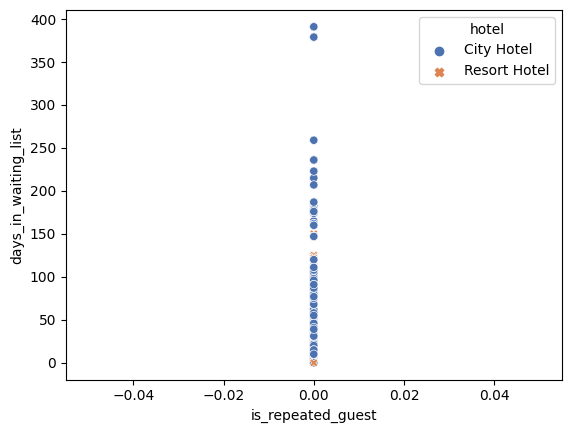

In [461]:
variables = ['days_in_waiting_list', 'is_repeated_guest', 'hotel']
df = df_base.loc[:, variables]
grf = sns.scatterplot(data=df, y="days_in_waiting_list", x="is_repeated_guest", style="hotel", hue="hotel", palette="deep")

# » Analisis de nulos en el DataSet

- **Grafico de porcenataje de nulos de todas las variables**

Procederemos a calcular el porcentaje de valores nulos por columna. Esta información nos sera muy útil para tomar decisiones individuales sobre cómo abordar estos valores nulos en cada caso específico.


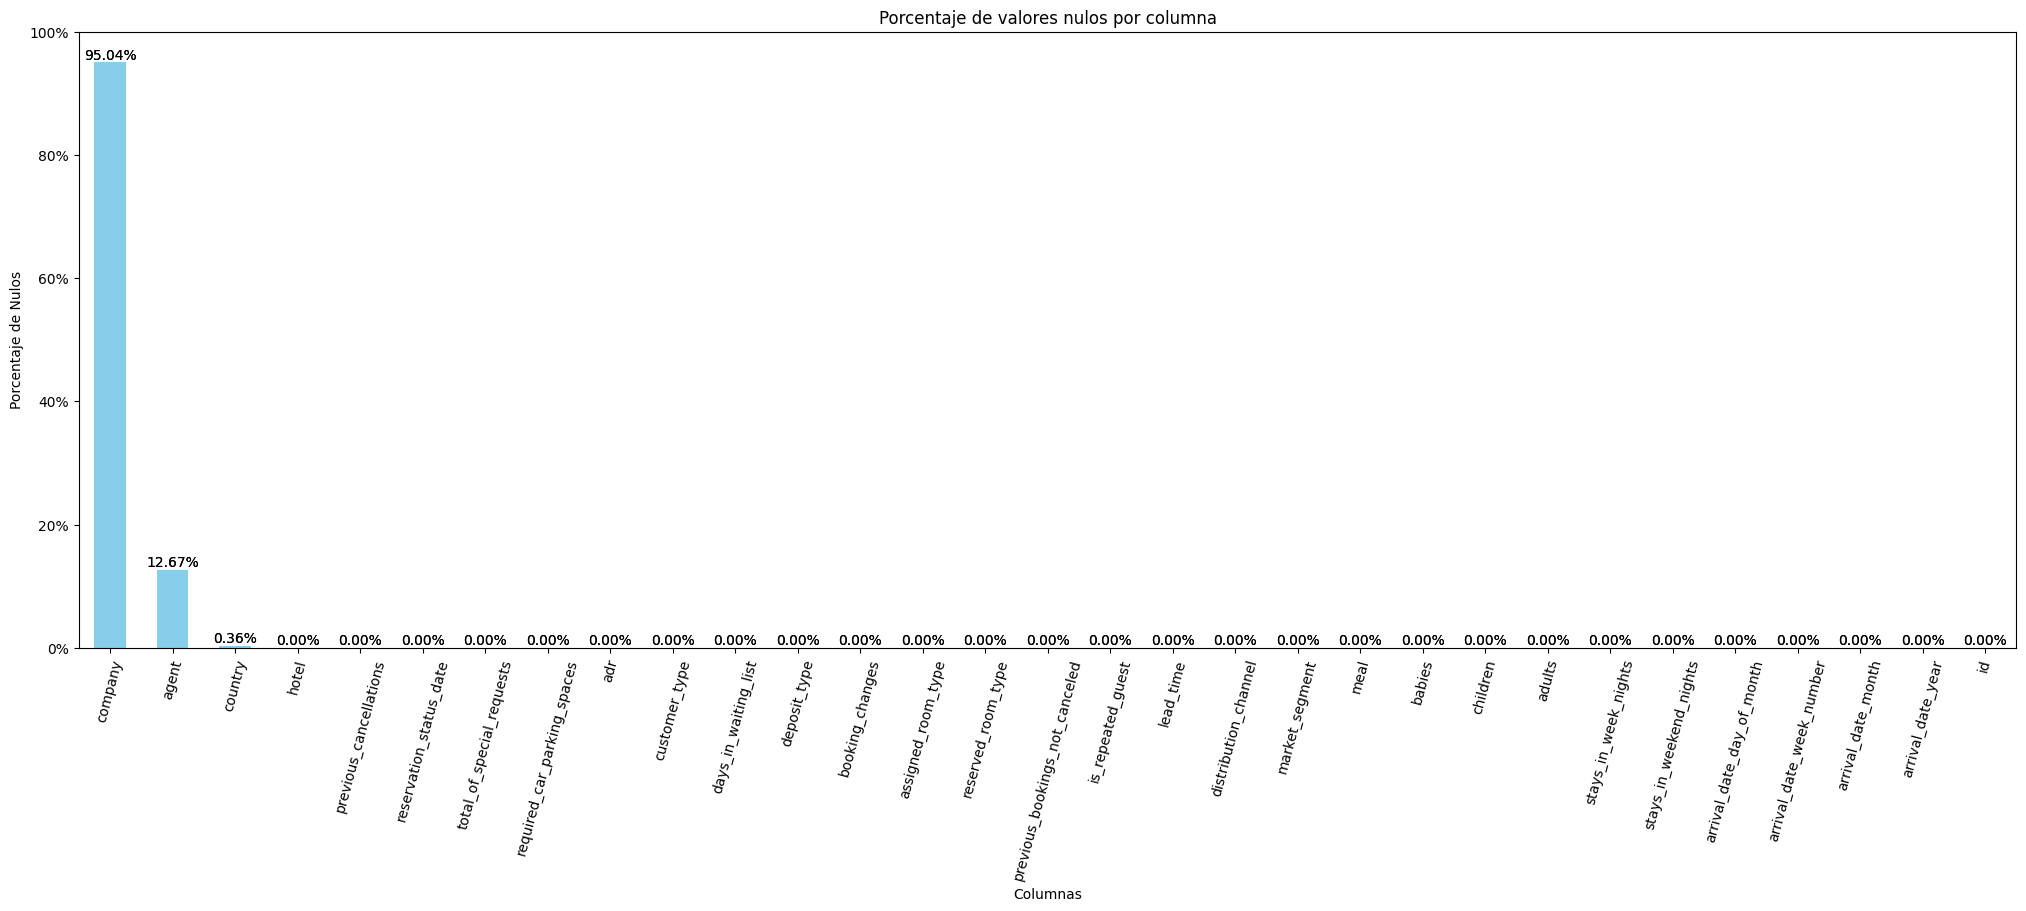

In [462]:
porcentaje_nulos = (ds_original.isnull().sum() / len(ds_original)) * 100
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)
plt.figure(figsize=(25, 8))
ax = porcentaje_nulos.plot(kind='bar', color='skyblue')

porcentaje_nulos.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos')
plt.xticks(rotation=75)
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

- Analizamos la cantidad de valores NaN en la columna 'agent'

In [463]:
ds_filtrado_agent = df_base['agent']

numero_de_NaN_agent = ds_filtrado_agent.isna().sum()
numero_de_lineas_agent = ds_filtrado_agent.shape[0]

porcentaje_de_NaN_agent = (numero_de_NaN_agent/numero_de_lineas_agent ) * 100
porcentaje_de_NaN_redondeado_agent = round(porcentaje_de_NaN_agent, 2)

valores_agent = {'numero_de_NaN': [numero_de_NaN_agent],
           'numero_de_lineas': [numero_de_lineas_agent],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_agent]}

df_agent = pd.DataFrame.from_dict(valores_agent)
df_agent.head()

,numero_de_NaN,numero_de_lineas,porcentaje_de_NaN
0,3363,26535,12.67


- Analizamos la cantidad de valores NaN en la columna 'company'

In [464]:

ds_filtrado_company = df_base['company']

numero_de_NaN_company = ds_filtrado_company.isna().sum()
numero_de_lineas_company = ds_filtrado_company.shape[0]

porcentaje_de_NaN_company = (numero_de_NaN_company/numero_de_lineas_company ) * 100
porcentaje_de_NaN_redondeado_company = round(porcentaje_de_NaN_company, 2)

valores_company = {'numero_de_NaN': [numero_de_NaN_company],
           'numero_de_lineas': [numero_de_lineas_company],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_company]}

df_company = pd.DataFrame.from_dict(valores_company)
df_company.head()


,numero_de_NaN,numero_de_lineas,porcentaje_de_NaN
0,25218,26535,95.04


Analizamos la cantidad de valores NaN en la columna 'country'

In [465]:
ds_filtrado_country = df_base['country']

numero_de_NaN_country = ds_filtrado_country.isna().sum()
numero_de_lineas_country = ds_filtrado_country.shape[0]

porcentaje_de_NaN_country = (numero_de_NaN_country/numero_de_lineas_country) * 100
porcentaje_de_NaN_redondeado_country = round(porcentaje_de_NaN_country, 2)

valores_country = {'numero_de_NaN': [numero_de_NaN_country],
           'numero_de_lineas': [numero_de_lineas_country],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_country]}

df_country = pd.DataFrame.from_dict(valores_country)
df_country.head()


,numero_de_NaN,numero_de_lineas,porcentaje_de_NaN
0,95,26535,0.36


Tanto en la columna agent como en company debido a la gran cantidad de valores NaN encotrados optamos por reemplazar todos estos valores NaN
por el nombre "not applicable".

In [466]:
ds_copia = ds_original.copy()

ds_unificado = pd.DataFrame(ds_copia)

ds_unificado.agent.fillna('not applicable', inplace=True)
ds_unificado.company.fillna('not applicable', inplace=True)

- Reemplazamos los valores NaN en la columna country con 'Undefined'

Asi quedaria la distribucion de country luego de la posibilidad de tener un valor 'Undefined'

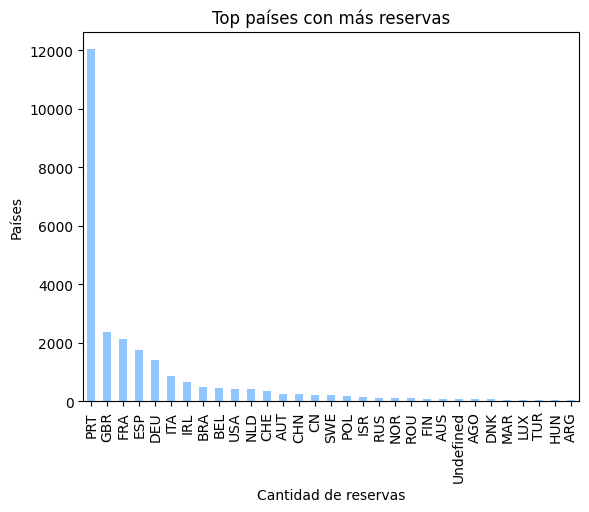

In [467]:
ds_filtrado_country = ds_unificado['country']

numero_de_NaN_country = ds_filtrado_country.isna().sum()
numero_de_lineas_country = ds_filtrado_country.shape[0]

porcentaje_de_NaN_country = (numero_de_NaN_country/numero_de_lineas_country ) * 100
porcentaje_de_NaN_redondeado_country = round(porcentaje_de_NaN_country, 2)

valores_country = {'numero_de_NaN': [numero_de_NaN_country],
           'numero_de_lineas': [numero_de_lineas_country],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_country]}


df_agent = pd.DataFrame.from_dict(valores_country)

ds_unificado.country.fillna('Undefined', inplace=True)

top_paises = ds_unificado['country'].value_counts().head(31)
paises = top_paises.plot.bar(alpha=1, title="Top países con más reservas", xlabel='Cantidad de reservas', ylabel='Países')


Grafico de la varibale 'agent' luego de cambiar los valores NaN por 'undefined'

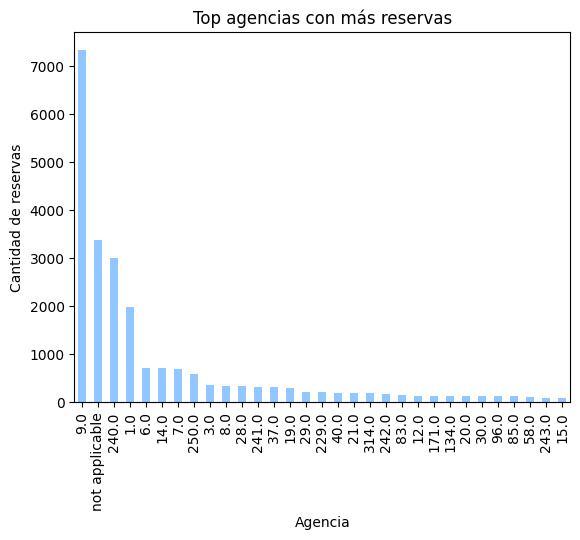

In [468]:
ds_filtrado_agent = ds_unificado['agent']

numero_de_NaN_agent = ds_filtrado_agent.isna().sum()
numero_de_lineas_agent = ds_filtrado_agent.shape[0]

porcentaje_de_NaN_agent = (numero_de_NaN_country/numero_de_lineas_agent ) * 100
porcentaje_de_NaN_redondeado_agent = round(porcentaje_de_NaN_agent, 2)

valores_agent = {'numero_de_NaN': [numero_de_NaN_agent],
           'numero_de_lineas': [numero_de_lineas_agent],
           'porcentaje_de_NaN': [porcentaje_de_NaN_redondeado_agent]}

df_agent = pd.DataFrame.from_dict(valores_agent)

top_agent = ds_unificado['agent'].value_counts().head(31)
paises = top_agent.plot.bar(alpha=1, title="Top agencias con más reservas", ylabel='Cantidad de reservas', xlabel='Agencia')

plt.show()


- Grafico para visualizar el porcentaje de nulos en el DataSet

Hay valores NULL? : False


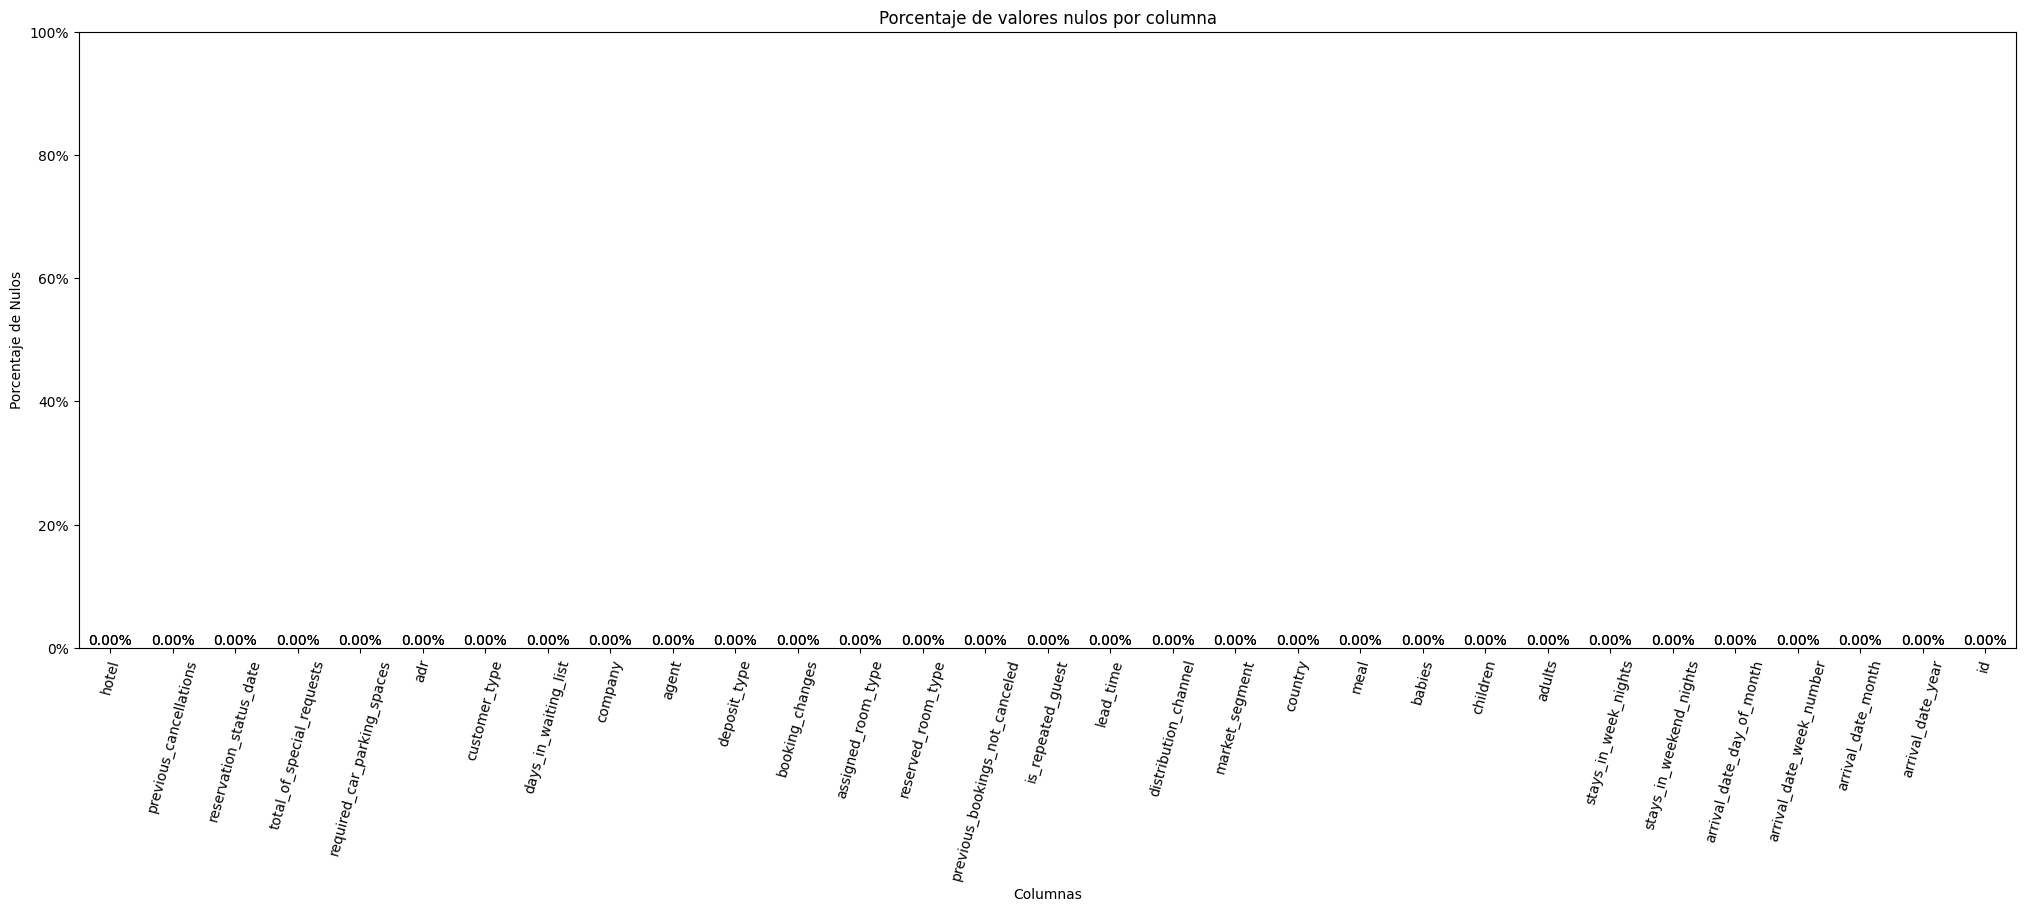

In [469]:
print("Hay valores NULL? :" , ds_unificado.country.isna().any())
porcentaje_nulos = (ds_unificado.isnull().sum() / len(ds_original)) * 100
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)
plt.figure(figsize=(25, 8))
ax = porcentaje_nulos.plot(kind='bar', color='skyblue')

porcentaje_nulos.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos')
plt.xticks(rotation=75)
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [470]:

# from google.colab import files
# df_base.to_csv('df_base_limpio.csv')
# files.download('df_base_limpio.csv')